In [2]:
import pandas as pd
df = pd.read_csv('emotion.txt', names=['sentence', 'label'], sep=';')
df

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
emotion = pd.get_dummies(df.label)
df_baru = pd.concat([df, emotion], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [4]:
sentence = df_baru['sentence'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [5]:
from sklearn.model_selection import train_test_split

kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(sentence, label, test_size=0.2)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=50, truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=50, truncating='post')

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.9):
      print("\nAkurasi telah mencapai 90%")
      self.model.stop_training = True
callbacks = Callback()

In [13]:
history = model.fit(padded_latih, label_latih, epochs=100, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
400/400 - 12s - loss: 1.6008 - accuracy: 0.3245 - val_loss: 1.5721 - val_accuracy: 0.3375 - 12s/epoch - 30ms/step
Epoch 2/100
400/400 - 8s - loss: 1.5826 - accuracy: 0.3313 - val_loss: 1.5703 - val_accuracy: 0.3375 - 8s/epoch - 21ms/step
Epoch 3/100
400/400 - 8s - loss: 1.2571 - accuracy: 0.4010 - val_loss: 1.1797 - val_accuracy: 0.4303 - 8s/epoch - 21ms/step
Epoch 4/100
400/400 - 7s - loss: 1.0536 - accuracy: 0.4408 - val_loss: 1.1744 - val_accuracy: 0.4356 - 7s/epoch - 19ms/step
Epoch 5/100
400/400 - 8s - loss: 0.9882 - accuracy: 0.4620 - val_loss: 1.1470 - val_accuracy: 0.4453 - 8s/epoch - 21ms/step
Epoch 6/100
400/400 - 8s - loss: 0.9200 - accuracy: 0.5349 - val_loss: 1.3766 - val_accuracy: 0.4613 - 8s/epoch - 21ms/step
Epoch 7/100
400/400 - 7s - loss: 0.7555 - accuracy: 0.6770 - val_loss: 1.0608 - val_accuracy: 0.6666 - 7s/epoch - 19ms/step
Epoch 8/100
400/400 - 8s - loss: 0.6355 - accuracy: 0.7387 - val_loss: 0.9741 - val_accuracy: 0.6778 - 8s/epoch - 21ms/step
Epoch 

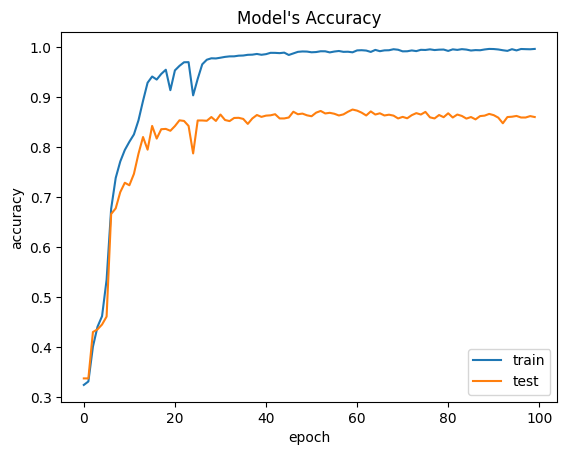

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

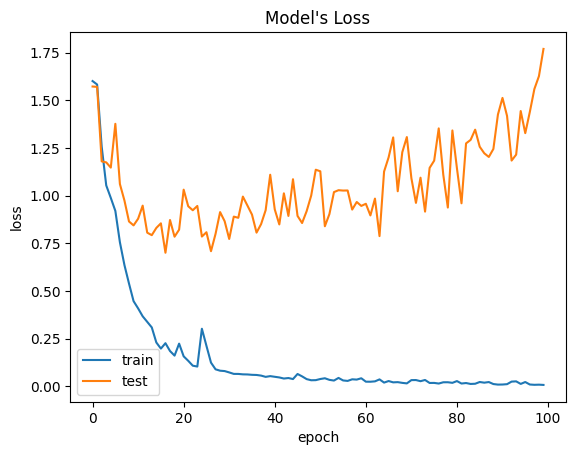

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()